# Tutorial: Scoring with ANS in R

The following tutorial shows how to score a signature with ANS in R. The jupyter notebook is heavily based on the `AddModuleScore` usage example of the Seurat method description, see [here](https://satijalab.org/seurat/reference/addmodulescore).

Equally to the Seurat 


In [1]:
library("Seurat")
source('../../src_R/adjusted_neighborhood_scoring.R')

Loading required package: SeuratObject

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, saveRDS


Loading Seurat v5 beta version 
To maintain compatibility with previous workflows, new Seurat objects will use the previous object structure by default
To use new Seurat v5 assays please run: options(Seurat.object.assay.version = 'v5')


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Load small sample dataset 

In [2]:
data("pbmc_small")

Define one signature and store it in list object

In [3]:
cd_features <- list(c(
  'CD79B',
  'CD79A',
  'CD19',
  'CD180',
  'CD200',
  'CD3D',
  'CD2',
  'CD3E',
  'CD7',
  'CD8A',
  'CD14',
  'CD1C',
  'CD68',
  'CD9',
  'CD247'
))

Score with ANS. 

In [4]:
pbmc_small <- AdjustedNeighborhoodScoring(
  object = pbmc_small,
  features = cd_features,
  ctrl = 5, # by default ANS uses 100 control genes per signature gene
  name = 'CD_scores_ANS'
)

Warning message:
“`GetAssayData()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `LayerData()` instead.”


First entries of small dataset

In [5]:
head(x = pbmc_small[])

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.8,letter.idents,groups,RNA_snn_res.1,CD_scores_ANS1
,<fct>,<dbl>,<int>,<fct>,<fct>,<chr>,<fct>,<dbl>
ATGCCAGAACGACT,SeuratProject,70,47,0,A,g2,0,0.7791735
CATGGCCTGTGCAT,SeuratProject,85,52,0,A,g1,0,0.7931169
GAACCTGATGAACC,SeuratProject,87,50,1,B,g2,0,0.8425729
TGACTGGATTCTCA,SeuratProject,127,56,0,A,g2,0,0.6067555
AGTCAGACTGCACA,SeuratProject,173,53,0,A,g2,0,0.4678895
TCTGATACACGTGT,SeuratProject,70,48,0,A,g1,0,1.4741454
TGGTATCTAAACAG,SeuratProject,64,36,0,A,g1,0,0.5359506
GCAGCTCTGTTTCT,SeuratProject,72,45,0,A,g1,0,0.5423551
GATATAACACGCAT,SeuratProject,52,36,0,A,g1,0,1.2401691


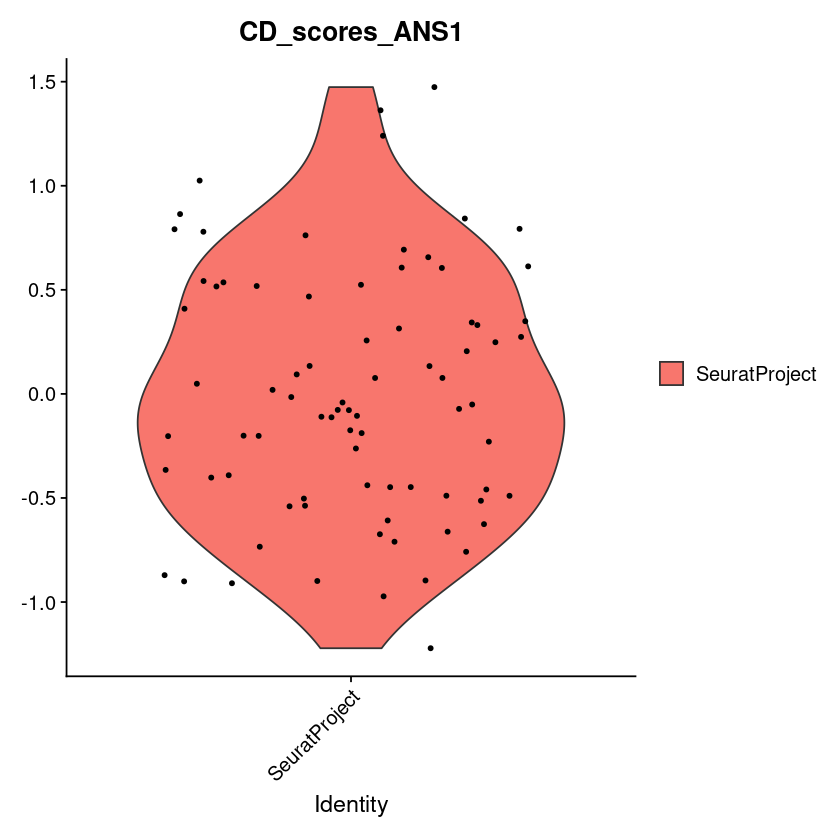

In [6]:
VlnPlot(object = pbmc_small, features = 'CD_scores_ANS1', group.by = 'orig.ident')